In [6]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import random
import time
import chess
import matplotlib.pyplot as plt 
import re
from itertools import combinations 
import operator
import statistics as stats
import math
from chess import engine

In [ ]:
board = chess.Board()

In [7]:
lichess_games = pd.read_csv("E:/Users/Justin/Desktop/Course Folders 2020/DSC440Mining/games.csv")

In [87]:
list(board.attacks(14))
#list(board.pieces(chess.PAWN, chess.WHITE))

[8, 9, 10, 11, 12, 13, 14, 15]

In [ ]:
board = chess.Board("1k1r4/pp1b1R2/3q2pp/4p3/2B5/4Q3/PPP2B2/2K5 b - - 0 1")
board

In [6]:
engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')

#engine.go(movetime=1000)

In [ ]:
#analysis = engine.analysis(board)
#for info in analysis:
    #print(info.get("score"))
    
    #if info.get("seldepth", 0) > 20:
            #break

In [7]:
board.legal_moves

<LegalMoveGenerator at 0x29b6418ff98 (Rh8, Rg8, Rf8, Re8, Rc8, Kc8, Ka8, Kc7, Be8, Bc8, Be6, Bc6, Bf5, Bb5, Bg4, Ba4, Bh3, Qf8, Qe7, Qc7, Qf6, Qe6, Qc6, Qb6, Qa6, Qd5, Qc5, Qd4, Qb4, Qd3, Qa3, Qd2+, Qd1+, b6, a6, h5, g5, e4, b5, a5)>

In [1]:
import chess.engine

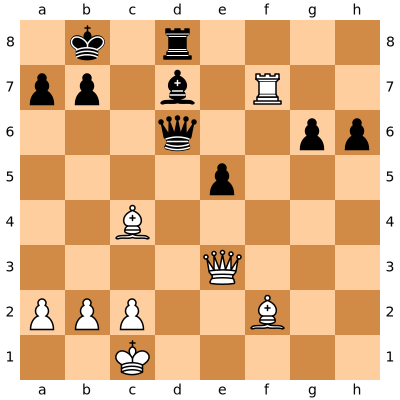

In [3]:
engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
board = chess.Board("1k1r4/pp1b1R2/3q2pp/4p3/2B5/4Q3/PPP2B2/2K5 b - - 0 1")
#info = engine.analyse(board, chess.engine.Limit(time=0.1))
board
#print('score: ', info['score'])

In [6]:
info = engine.analyse(board, chess.engine.Limit(time=0.1))
print('score: ', info['score'])

score:  #+3


In [8]:
board.push_san('Be8')

Move.from_uci('d7e8')

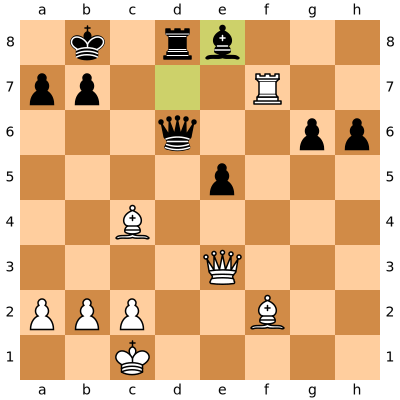

In [9]:
board

In [10]:
board.pop()

Move.from_uci('d7e8')

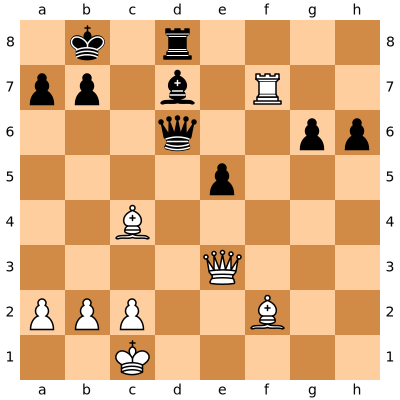

In [11]:
board

In [6]:
board = chess.Board()

In [10]:
board.legal_moves

<LegalMoveGenerator at 0x11c7f8ccc88 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

In [13]:
board.pop()

Move.from_uci('e2e4')

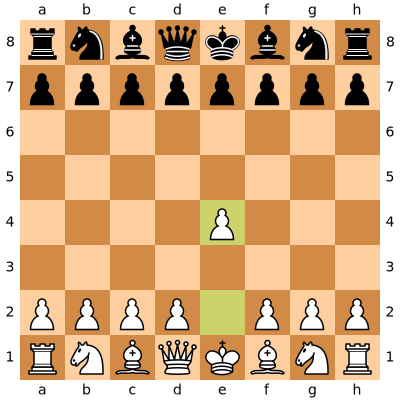

In [14]:
board.push_san('e4')
board

-96
-40
-23
-79
-13
-54
-103
17
-42
-69
-51
-55
-91
-118
-143
-36
-74
14
-148
-69


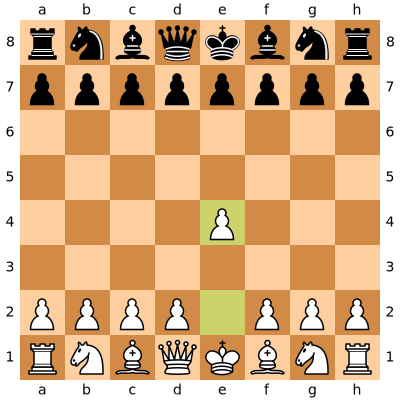

In [25]:
engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
for i in board.legal_moves:

    info = engine.analyse(board, chess.engine.Limit(depth=20), root_moves=[i])
    print(int(str(info['score'])))
    #print('score: ', info['score'])
    
#engine.quit()
board

In [23]:
board.legal_moves

<LegalMoveGenerator at 0x11c7f8a3390 (Nh6, Nf6, Nc6, Na6, h6, g6, f6, e6, d6, c6, b6, a6, h5, g5, f5, e5, d5, c5, b5, a5)>

In [ ]:
#lichess_games['moves'][0]
board = chess.Board()
engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
for move in lichess_games['moves'][1].split(' '):
    board.push_san(move)
    info = engine.analyse(board, chess.engine.Limit(depth=50))
    print(int(str(info['score'])))

In [3]:
str('#+3')[1:]

'+3'

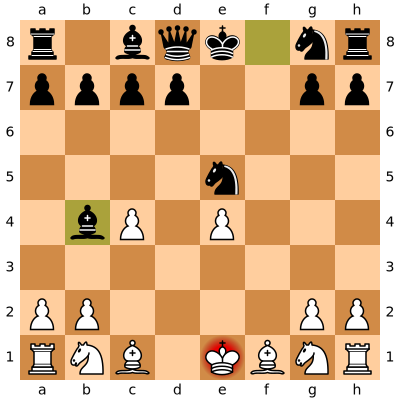

In [35]:
board

In [4]:
def minmax_norm(data):
    
    max_count = max(data.values())
    min_count = min(data.values())
    
    ret_dict = {}
    for key in data:
        ret_dict[key] = (data[key] - min_count)/(max_count - min_count)
    return ret_dict

In [8]:
lichess = lichess_games.drop(columns = ['id', 'rated', 'created_at', 'last_move_at', 'increment_code', 'white_id', 'black_id', 'opening_eco'])


In [16]:
lichess.head()

,turns,victory_status,winner,white_rating,black_rating,moves,opening_name,opening_ply,opening_core
0,13,outoftime,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,Slav Defense: Exchange Variation,5,Slav Defense
1,16,resign,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,4,Nimzowitsch Defense
2,61,mate,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,3,King's Pawn Game
3,61,mate,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,Queen's Pawn Game: Zukertort Variation,3,Queen's Pawn Game
4,95,mate,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,Philidor Defense,5,Philidor Defense


In [12]:
opening_core = [lichess['opening_name'][i].split(':')[0] for i in range(lichess_games.shape[0])]
lichess['opening_core'] = opening_core

In [74]:
abs(lichess['white_rating'] - lichess['black_rating'])

0        309
1         61
2          4
3         15
4         54
5        248
6         97
7        695
8         47
9        172
10       109
11       486
12       555
13       226
14        47
15        47
16        47
17        47
18       206
19       406
20       582
21        26
22       406
23       201
24       310
25       141
26       746
27       290
28       100
29        71
        ... 
20028    158
20029     24
20030      3
20031    349
20032     14
20033     14
20034    362
20035    162
20036    189
20037     82
20038    112
20039    300
20040    200
20041    507
20042    494
20043     38
20044    267
20045     45
20046     15
20047     40
20048     19
20049     76
20050    101
20051      6
20052     31
20053    471
20054     37
20055     67
20056    133
20057    104
Length: 20058, dtype: int64

In [13]:
white_winners = lichess[lichess['winner'] == 'white']
black_winners = lichess[lichess['winner'] == 'black']
### openings for white players that win 
white_heights = {}
for i in white_winners['opening_core']:
    if i not in white_heights.keys():
        white_heights[i] = 1
    else:
        white_heights[i] += 1
#### openings for black players that win 
black_heights = {}
for i in black_winners['opening_core']:
    if i not in black_heights.keys():
        black_heights[i] = 1
    else:
        black_heights[i] += 1

white_heights = minmax_norm(white_heights)    
black_heights = minmax_norm(black_heights)

print('white max and min respectively: ')
print(max(white_heights, key=white_heights.get))
print(min(white_heights, key=white_heights.get), '\n\n')

print('black max and min respectively: ')
print(max(black_heights, key=black_heights.get))
print(min(black_heights, key=black_heights.get))

white max and min respectively: 
Sicilian Defense
Global Opening 


black max and min respectively: 
Sicilian Defense
Alekhine Defense #2


In [14]:
lichess.head()

,turns,victory_status,winner,white_rating,black_rating,moves,opening_name,opening_ply,opening_core
0,13,outoftime,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,Slav Defense: Exchange Variation,5,Slav Defense
1,16,resign,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,4,Nimzowitsch Defense
2,61,mate,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,3,King's Pawn Game
3,61,mate,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,Queen's Pawn Game: Zukertort Variation,3,Queen's Pawn Game
4,95,mate,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,Philidor Defense,5,Philidor Defense


In [9]:
highgames = lichess[lichess['white_rating'] > 2000]
highgames = highgames[highgames['black_rating'] > 2000]

In [ ]:
if (i + 1) % args.save_step == 0:
    torch.save(decoder.state_dict(), os.path.join(
        args.model_path, 'highgames.ckpt'))

In [17]:
highgames['moves'][:10]

636    e4 e5 Nf3 Nc6 Nc3 Nf6 Nxe5 Nxe5 d4 Nc6 d5 Bb4 ...
637    e4 c5 d4 cxd4 c3 Nf6 e5 Nd5 cxd4 d6 exd6 Qxd6 ...
638    e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 ...
639    d4 Nf6 Nf3 d5 g3 Bf5 Bg2 e6 O-O Be7 c4 c6 Nc3 ...
642    d4 Nf6 c4 c5 d5 e6 Nc3 exd5 cxd5 d6 e4 g6 f4 B...
651    d4 Nf6 c4 e6 Nc3 d5 Nf3 Bb4 Bg5 Nbd7 cxd5 exd5...
652    e4 e5 Nf3 Nf6 d3 d5 exd5 Qxd5 Nc3 Bb4 Bd2 Bxc3...
654    e4 c6 d4 d5 Nc3 dxe4 Nxe4 Nd7 Bc4 Ngf6 Nxf6+ N...
656    d4 Nf6 c4 e6 Nc3 Bb4 Nf3 O-O Qd3 d5 Bg5 h6 Bxf...
659    e4 c5 Nf3 e6 d4 cxd4 Nxd4 a6 Nc3 b5 a3 Bb7 Bd3...
Name: moves, dtype: object

In [47]:
save_tensor = torch.zeros((100, max(highgames['turns'])))

In [49]:
count = 0
for i in highgames['moves'][:100]:
    
    engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
    current_game = i
    moves_list = current_game.split(' ')
    board = chess.Board()
    
    zeros = torch.zeros(max(highgames['turns']) - len(moves_list))
    moves = []
    
    for move in moves_list:

        board.push_san(move)
        info = engine.analyse(board, chess.engine.Limit(depth=20))
        
        if str(info['score'])[0] != '#':
            moves.append(int(str(info['score'])))
        else:
            moves.append(int(str(info['score'])[1:]))

    ret = torch.cat([torch.tensor(moves).long(), zeros.long()], 0)
    save_tensor[count] = ret
    
    if count%10 == 0:
           
        print(count)
    count += 1


0
10
20
30
40
50
60
70
80
90


In [61]:
torch.save(save_tensor, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint1.ckpt') 

In [56]:
save_tensor2 = torch.zeros((100, max(highgames['turns'])))

In [57]:
count = 0
for i in highgames['moves'][100:200]:
    
    engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
    current_game = i
    moves_list = current_game.split(' ')
    board = chess.Board()
    
    zeros = torch.zeros(max(highgames['turns']) - len(moves_list))
    moves = []
    
    for move in moves_list:

        board.push_san(move)
        info = engine.analyse(board, chess.engine.Limit(depth=20))
        
        if str(info['score'])[0] != '#':
            moves.append(int(str(info['score'])))
        else:
            moves.append(int(str(info['score'])[1:]))

    ret = torch.cat([torch.tensor(moves).long(), zeros.long()], 0)
    save_tensor2[count] = ret
    
    if count%10 == 0:
        print(count)
    count += 1


0
10
20
30
40
50
60
70
80
90


In [62]:
torch.save(save_tensor2, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint2.ckpt')    

In [58]:
save_tensor3 = torch.zeros((100, max(highgames['turns'])))

In [59]:
count = 0
for i in highgames['moves'][200:300]:
    
    engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
    current_game = i
    moves_list = current_game.split(' ')
    board = chess.Board()
    
    zeros = torch.zeros(max(highgames['turns']) - len(moves_list))
    moves = []
    
    for move in moves_list:

        board.push_san(move)
        info = engine.analyse(board, chess.engine.Limit(depth=20))
        
        if str(info['score'])[0] != '#':
            moves.append(int(str(info['score'])))
        else:
            moves.append(int(str(info['score'])[1:]))

    ret = torch.cat([torch.tensor(moves).long(), zeros.long()], 0)
    save_tensor3[count] = ret
    
    if count%10 == 0:
        torch.save(save_tensor3, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint3.ckpt')    
        print(count)
    count += 1

0


KeyboardInterrupt: 

In [66]:
saved = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint4.ckpt')

In [ ]:
save_tensor4 = torch.zeros((100, max(highgames['turns'])))

In [69]:
save_tensor4 = saved

In [71]:
print(save_tensor4)

tensor([[ 15., 105., -58.,  ...,   0.,   0.,   0.],
        [ 15., 105., -58.,  ...,   0.,   0.,   0.],
        [ 15.,  84., -20.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.]])


In [72]:
count = 80
for i in highgames['moves'][380:400]:
    
    engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
    current_game = i
    moves_list = current_game.split(' ')
    board = chess.Board()
    
    zeros = torch.zeros(max(highgames['turns']) - len(moves_list))
    moves = []
    
    for move in moves_list:

        board.push_san(move)
        info = engine.analyse(board, chess.engine.Limit(depth=20))
        
        if str(info['score'])[0] != '#':
            moves.append(int(str(info['score'])))
        else:
            moves.append(int(str(info['score'])[1:]))

    ret = torch.cat([torch.tensor(moves).long(), zeros.long()], 0)
    save_tensor4[count] = ret
    
    if count%10 == 0:
        torch.save(save_tensor4, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint4.ckpt')    
        print(count)
    count += 1
torch.save(save_tensor4, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint4.ckpt')    


80
90


In [ ]:
save_tensor5 = torch.zeros((100, max(highgames['turns'])))

In [ ]:
count = 0
for i in highgames['moves'][400:500]:
    
    engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
    current_game = i
    moves_list = current_game.split(' ')
    board = chess.Board()
    
    zeros = torch.zeros(max(highgames['turns']) - len(moves_list))
    moves = []
    
    for move in moves_list:

        board.push_san(move)
        info = engine.analyse(board, chess.engine.Limit(depth=20))
        
        if str(info['score'])[0] != '#':
            moves.append(int(str(info['score'])))
        else:
            moves.append(int(str(info['score'])[1:]))

    ret = torch.cat([torch.tensor(moves).long(), zeros.long()], 0)
    save_tensor5[count] = ret
    
    if count%10 == 0:
        torch.save(save_tensor5, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint5.ckpt')    
        print(count)
    count += 1

In [ ]:
save_tensor6 = torch.zeros((100, max(highgames['turns'])))

In [ ]:
count = 0
for i in highgames['moves'][500:600]:
    
    engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
    current_game = i
    moves_list = current_game.split(' ')
    board = chess.Board()
    
    zeros = torch.zeros(max(highgames['turns']) - len(moves_list))
    moves = []
    
    for move in moves_list:

        board.push_san(move)
        info = engine.analyse(board, chess.engine.Limit(depth=20))
        
        if str(info['score'])[0] != '#':
            moves.append(int(str(info['score'])))
        else:
            moves.append(int(str(info['score'])[1:]))

    ret = torch.cat([torch.tensor(moves).long(), zeros.long()], 0)
    save_tensor6[count] = ret
    
    if count%10 == 0:
        torch.save(save_tensor6, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint6.ckpt')    
        print(count)
    count += 1

In [ ]:
save_tensor7 = torch.zeros((100, max(highgames['turns'])))

In [ ]:
count = 0
for i in highgames['moves'][600:700]:
    
    engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
    current_game = i
    moves_list = current_game.split(' ')
    board = chess.Board()
    
    zeros = torch.zeros(max(highgames['turns']) - len(moves_list))
    moves = []
    
    for move in moves_list:

        board.push_san(move)
        info = engine.analyse(board, chess.engine.Limit(depth=20))
        
        if str(info['score'])[0] != '#':
            moves.append(int(str(info['score'])))
        else:
            moves.append(int(str(info['score'])[1:]))

    ret = torch.cat([torch.tensor(moves).long(), zeros.long()], 0)
    save_tensor7[count] = ret
    
    if count%10 == 0:
        torch.save(save_tensor7, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint7.ckpt')    
        print(count)
    count += 1

In [ ]:
save_tensor8 = torch.zeros((100, max(highgames['turns'])))

In [ ]:
count = 0
for i in highgames['moves'][700:800]:
    
    engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
    current_game = i
    moves_list = current_game.split(' ')
    board = chess.Board()
    
    zeros = torch.zeros(max(highgames['turns']) - len(moves_list))
    moves = []
    
    for move in moves_list:

        board.push_san(move)
        info = engine.analyse(board, chess.engine.Limit(depth=20))
        
        if str(info['score'])[0] != '#':
            moves.append(int(str(info['score'])))
        else:
            moves.append(int(str(info['score'])[1:]))

    ret = torch.cat([torch.tensor(moves).long(), zeros.long()], 0)
    save_tensor8[count] = ret
    
    if count%10 == 0:
        torch.save(save_tensor8, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint8.ckpt')    
        print(count)
    count += 1

In [ ]:
save_tensor9 = torch.zeros((100, max(highgames['turns'])))

In [ ]:
count = 0
for i in highgames['moves'][800:]:
    
    engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
    current_game = i
    moves_list = current_game.split(' ')
    board = chess.Board()
    
    zeros = torch.zeros(max(highgames['turns']) - len(moves_list))
    moves = []
    
    for move in moves_list:

        board.push_san(move)
        info = engine.analyse(board, chess.engine.Limit(depth=20))
        
        if str(info['score'])[0] != '#':
            moves.append(int(str(info['score'])))
        else:
            moves.append(int(str(info['score'])[1:]))

    ret = torch.cat([torch.tensor(moves).long(), zeros.long()], 0)
    save_tensor9[count] = ret
    
    if count%10 == 0:
        torch.save(save_tensor9, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint9.ckpt')    
        print(count)
    count += 1

In [114]:
test = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint8.ckpt')

In [115]:
test

tensor([[ 15., 106.,  42.,  ...,   0.,   0.,   0.],
        [-18.,  65., -11.,  ...,   0.,   0.,   0.],
        [-18.,  93.,  -5.,  ...,   0.,   0.,   0.],
        ...,
        [ 15., 107., -30.,  ...,   0.,   0.,   0.],
        [ 15.,  84., -20.,  ...,   0.,   0.,   0.],
        [-18.,  65., -33.,  ...,   0.,   0.,   0.]])

In [4]:
count = 0
for i in test:
    
    if i[0] == 0:
        print(count)
        break
    count += 1

81


In [19]:
highgames['moves'][781:782]

19004    e4 e6 d4 d5 e5 c5 c3 Nc6 Nf3 Qb6 a3 Bd7 b4 cxd...
Name: moves, dtype: object

In [12]:
highgames['moves'][700:800]

17879    e4 g6 f4 d5 e5 c5 Nf3 Nc6 c3 Bg4 Be2 e6 h3 Bxf...
17880    d4 Nf6 Nf3 g6 Bg5 Bg7 e3 O-O Nbd2 d5 Bd3 Nbd7 ...
17881    d4 f5 Nc3 Nf6 Bg5 d5 e3 e6 Nf3 c5 Bb5+ Nc6 Ne5...
17882    d4 e6 Nf3 Nf6 Bf4 d6 Nbd2 Be7 e3 b6 h3 c5 c3 B...
17883    d4 d5 Nf3 Nf6 Bf4 e6 e3 c5 Nbd2 Nc6 c3 Bd6 Ne5...
17884    e4 c6 d4 g6 Nc3 Bg7 Be3 d5 Qd2 Nf6 exd5 cxd5 N...
17885    g3 g6 Bg2 Bg7 d4 f5 c4 Nf6 Nc3 O-O e3 d6 Nge2 ...
17886    d4 e6 Nf3 d5 Bf4 Nf6 e3 Bd6 Bg3 O-O Nbd2 c5 c3...
17887    e4 e6 d4 d5 exd5 exd5 Bd3 c5 Nf3 Nc6 c3 Bg4 Be...
17888    d4 d5 c4 dxc4 Nc3 a6 a4 Nf6 e4 e5 d5 Bb4 f3 O-...
17889    d4 d5 Nf3 c6 Bf4 Nf6 Nbd2 e6 e3 Bd6 Ne5 Qe7 Bd...
17890    d4 d5 c4 dxc4 a4 Nf6 e3 e5 Bxc4 exd4 Qxd4 Qxd4...
17891    d4 g6 e4 Bg7 Nf3 d6 c3 Bg4 Bd3 Nc6 O-O e5 d5 N...
17894    d4 Nf6 Bf4 d5 e3 c6 Nf3 g6 Nbd2 Bg7 Bd3 O-O O-...
17895    d4 Nf6 Bf4 b6 Nf3 Bb7 Nbd2 e6 e3 d5 Bd3 Nbd7 c...
17896    e4 e6 d4 d5 Nd2 h6 c3 c5 dxc5 dxe4 Nxe4 Qxd1+ ...
17897    d4 d5 Nf3 e6 Bf4 Nf6 e3 Nbd7 Bd3 c5 c3 Be7 O-O.

In [25]:
save_tensor8 = torch.load('C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint8.ckpt')

In [117]:
engine = chess.engine.SimpleEngine.popen_uci('C:/Users/Justin/Desktop/currentworks/miningproject/stockfish-11-win/Windows/stockfish_20011801_x64')
current_game = highgames['moves'][781:800][19338]
moves_list = current_game.split(' ')
board = chess.Board()

In [109]:
zeros = torch.zeros(max(highgames['turns']) - len(moves_list))
moves = []

In [ ]:
for move in moves_list:

    board.push_san(move)
    info = engine.analyse(board, chess.engine.Limit(depth=20), root_moves = [move])

    if str(info['score'])[0] != '#':
        moves.append(int(str(info['score'])))
    else:
        moves.append(int(str(info['score'])[1:]))

ret = torch.cat([torch.tensor(moves).long(), zeros.long()], 0)


Exception in callback EngineProtocol._line_received('readyok')
handle: <Handle EngineProtocol._line_received('readyok')>
Traceback (most recent call last):
  File "E:\Users\Justin\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "E:\Users\Justin\Anaconda3\lib\site-packages\chess\engine.py", line 725, in _line_received
    self.command._line_received(self, line)
  File "E:\Users\Justin\Anaconda3\lib\site-packages\chess\engine.py", line 979, in _line_received
    self.line_received(engine, line)
  File "E:\Users\Justin\Anaconda3\lib\site-packages\chess\engine.py", line 1338, in line_received
    self._readyok(engine)
  File "E:\Users\Justin\Anaconda3\lib\site-packages\chess\engine.py", line 1347, in _readyok
    engine._go(limit, root_moves=root_moves)
  File "E:\Users\Justin\Anaconda3\lib\site-packages\chess\engine.py", line 1235, in _go
    builder.extend(move.uci() for move in root_moves)
  File "E:\Users\Justin\Anaconda3\lib

In [ ]:
ret

In [111]:
save_tensor8[99] = ret

In [113]:
torch.save(save_tensor8, 'C:/Users/Justin/Desktop/currentworks/miningproject/saving/checkpoint8.ckpt')    


In [112]:
print(save_tensor8)

tensor([[ 15., 106.,  42.,  ...,   0.,   0.,   0.],
        [-18.,  65., -11.,  ...,   0.,   0.,   0.],
        [-18.,  93.,  -5.,  ...,   0.,   0.,   0.],
        ...,
        [ 15., 107., -30.,  ...,   0.,   0.,   0.],
        [ 15.,  84., -20.,  ...,   0.,   0.,   0.],
        [-18.,  65., -33.,  ...,   0.,   0.,   0.]])


In [18]:
max(highgames['turns'])

349

In [42]:
highgames['moves'].shape[0]

849

In [21]:
torch.zeros((highgames.shape[0], max(highgames['turns']))).shape

torch.Size([849, 349])

In [30]:
x = torch.zeros(max(highgames['turns']))
y = torch.ones(1)

In [32]:
torch.cat([x, y], 0).shape

torch.Size([350])

In [33]:
torch.tensor([1, 2, 3])

tensor([1, 2, 3])